<a href="https://colab.research.google.com/github/thaohung13/AI_W9_31_3_2023/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

In [3]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [4]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

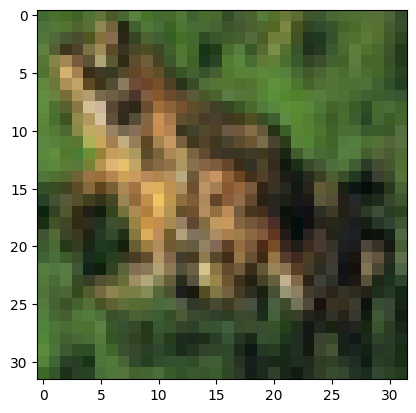

Số này là: [6]


In [10]:
a= x_train[5355]
plt.imshow(a)
plt.show()
print('Số này là:',y_train[5355])

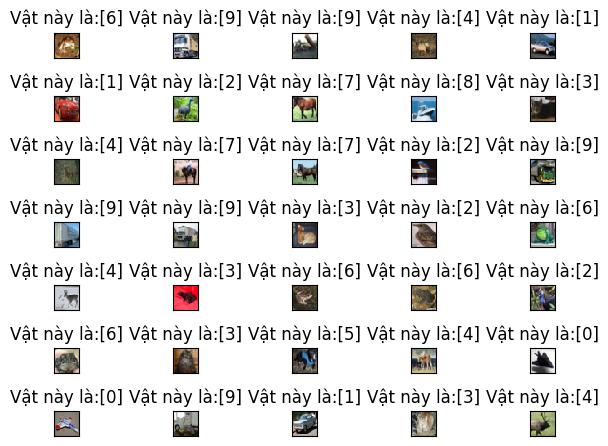

In [11]:
for i in range(35):
  plt.subplot(7,5,i+1)#
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('Vật này là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

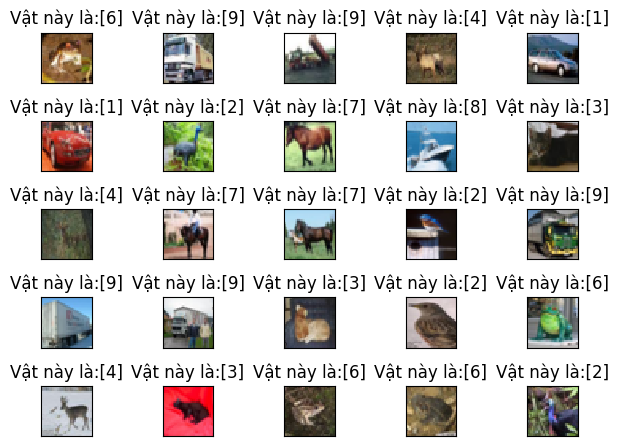

In [12]:
for i in range(25):
  plt.subplot(5,5,i+1)#
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('Vật này là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [40]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))#them 1 lop 512 newral
model.add(Dense(512,activation='relu',input_shape=(11*11*3,)))
model.add(Dense(512,activation='relu',input_shape=(10*10*3,)))
model.add(Dense(512,activation='relu',input_shape=(7*7*3,)))
model.add(Dense(512,activation='relu',input_shape=(6*6*3,)))
model.add(Dense(512,activation='relu',input_shape=(4*4*3,)))
model.add(Dense(512,activation='relu',input_shape=(3*3*3,)))
model.add(Dense(512,activation='relu',input_shape=(2*2*3,)))
model.add(Dense(512,activation='relu',input_shape=(1*1*3,)))
model.add(Dense(512,activation='relu',input_shape=(1*1*3,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 512)               1573376   
                                                                 
 dense_144 (Dense)           (None, 512)               262656    
                                                                 
 dense_145 (Dense)           (None, 512)               262656    
                                                                 
 dense_146 (Dense)           (None, 512)               262656    
                                                                 
 dense_147 (Dense)           (None, 512)               262656    
                                                                 
 dense_148 (Dense)           (None, 512)               262656    
                                                                 
 dense_149 (Dense)           (None, 512)             

In [15]:
x_train=x_train.reshape((50000,32*32*3))#anh gray gtri tu 0-255
x_train=x_train.astype('float32')/255 #chia de ve gtri 0/1
print(x_train.shape)

(50000, 3072)


In [16]:
x_test=x_test.reshape((10000,32*32*3))# anh gray gtri tu 0-255
x_test=x_test.astype('float32')/255 #chia de ve gtri 0/1
print(x_test.shape)

(10000, 3072)


In [17]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [43]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Bộ tối ưu (optimizer),Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=100,batch_size=128) #epochs:so lan hoc, batch_size=128: boc ngau nhien 128 anh trong bo du lieu de hoc 
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/100
391/391 [==============================] - 33s 81ms/step - loss: 1.3740 - accuracy: 0.5178
Epoch 2/100
391/391 [==============================] - 31s 79ms/step - loss: 1.3458 - accuracy: 0.5300
Epoch 3/100
391/391 [==============================] - 31s 79ms/step - loss: 1.3227 - accuracy: 0.5384
Epoch 4/100
391/391 [==============================] - 32s 82ms/step - loss: 1.3010 - accuracy: 0.5459
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 1.2824 - accuracy: 0.5524
Epoch 6/100
391/391 [==============================] - 32s 82ms/step - loss: 1.2646 - accuracy: 0.5582
Epoch 7/100
391/391 [==============================] - 31s 79ms/step - loss: 1.2454 - accuracy: 0.5666
Epoch 8/100
391/391 [==============================] - 32s 82ms/step - loss: 1.2233 - accuracy: 0.5739
Epoch 9/100
391/391 [==============================] - 31s 79ms/step - loss: 1.2093 - accuracy: 0.5801
Epoch 10/100
391/391 [==============================] - 32s 82ms/step - l

In [44]:
model.save('test1.h5')

1/1 [==============================] - 0s 174ms/step


array([2])

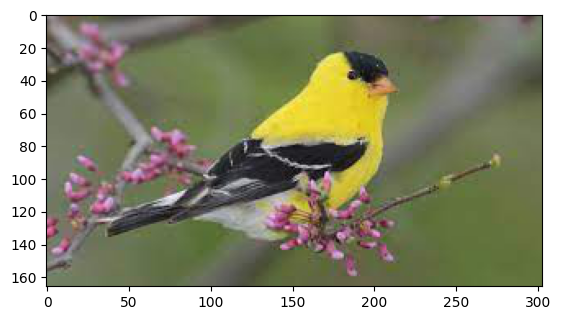

In [45]:
img = Image.open('download.jpg')
imshow(img)
img = load_img('download.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

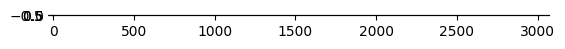

In [46]:
Img=plt.imread('/content/download.jpg')
plt.imshow(img)
plt.show()

In [47]:
Img=load_img('/content/download.jpg',target_size=(32,32))
Img= img_to_array(img)
Img =img.reshape(1,32*32*3)
Img =img.astype('float32')
Img =Img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 29ms/step


array([2])

In [48]:
X=x_test
Y=y_test

In [49]:
X_pred=X[1000].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
model11=load_model('/content/test1.h5')
Y_pred = model11.predict(X_pred)
print(Y_pred)

1/1 [==============================] - 0s 127ms/step
[[2.3300183e-06 7.8276156e-11 8.6031491e-01 7.1457989e-04 1.3883811e-01
  7.2056871e-05 5.3550779e-05 4.4468693e-06 1.7176913e-09 5.2290189e-10]]


#---DONE---